---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Scikit-Learn

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Scikit-Learn: Introduction

Scikit-learn is a collection of tools for machine learning written in Python:
[http://scikit-learn.org](http://scikit-learn.org)

## Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.


A classification algorithm, for example, expects the data to be represented as a **feature matrix** and a **label vector**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

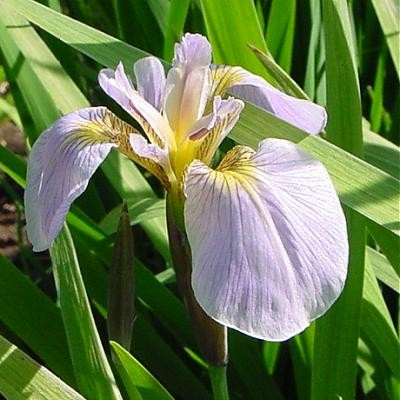

Iris Setosa



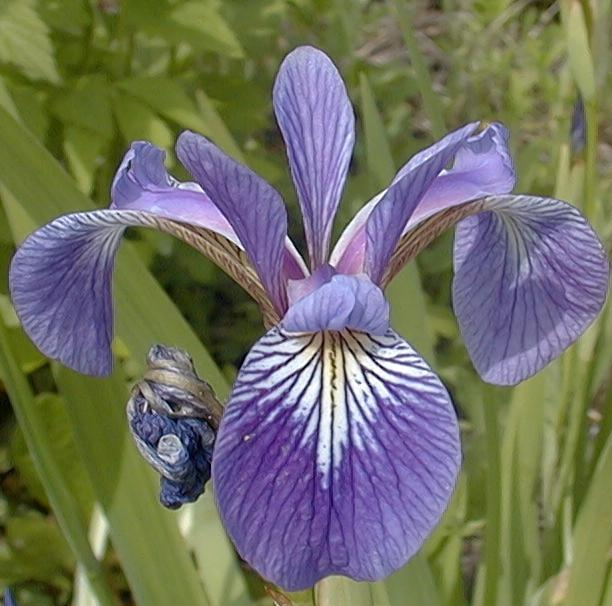

Iris Versicolor



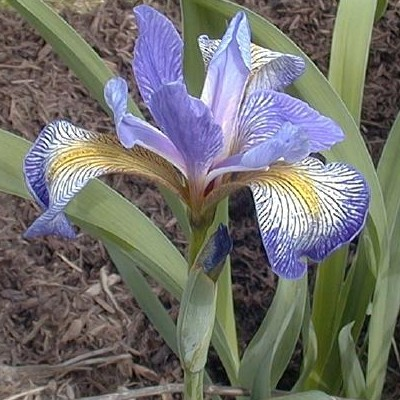

Iris Virginica


In [2]:
from IPython.core.display import Image, display
display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg', width=200, height=200))
print "Iris Setosa\n"

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg', width=200, height=200))
print "Iris Versicolor\n"

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg', width=200, height=200))
print "Iris Virginica"

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)
print iris.data[0]

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [6]:
print iris.data.shape
print iris.target.shape

(150, 4)
(150,)


In [7]:
print iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

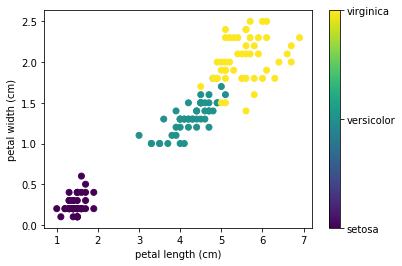

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

In [10]:
from sklearn import datasets

In [11]:
datasets.make_classification()

(array([[ -3.30640348e-01,   1.01915353e+00,  -4.00805018e-01, ...,
          -1.03443367e+00,  -1.44844660e+00,   8.62319685e-01],
        [ -7.87624517e-01,   2.70192141e+00,   2.08004026e-01, ...,
          -2.94040614e+00,   1.87723335e+00,  -2.64255243e-01],
        [  3.04700688e-01,  -1.72877128e+00,   1.54185312e+00, ...,
           1.86981059e+00,  -3.49856531e-01,  -2.13916347e+00],
        ..., 
        [  9.85348705e-01,  -1.14491099e-01,  -1.15253583e+00, ...,
          -6.99150640e-04,  -1.66200869e+00,  -3.04957119e-01],
        [ -2.55865418e-01,  -2.02773915e-01,   6.06258747e-01, ...,
           8.27154246e-01,   1.09517826e+00,   1.25949502e+00],
        [ -1.37370235e+00,   1.70413070e+00,  -1.56561574e+00, ...,
          -1.77353183e+00,   1.70676422e-01,   1.25193933e-01]]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 

### The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [12]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [13]:
model = LinearRegression(normalize=True)
print model.normalize

True


In [14]:
print model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [15]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

(-0.5, 2.5)

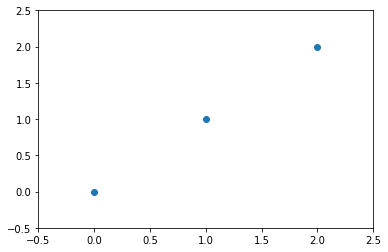

In [16]:
plt.plot(x, y, 'o')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

In [17]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print X
print y

[[0]
 [1]
 [2]]
[0 1 2]


In [18]:
model.fit(X, y) 
print model.coef_
print model.intercept_

[ 1.]
1.11022302463e-16


The model found a line with a slope 1 and intercept 0, as we'd expect.

## Supervised vs. Unsupervised Learning

The algorithms of machine learning are generally split into two basic categories: **Supervised** and **Unsupervised** learning.

### Supervised Learning
**Supervised** learning concerns **labeled** data, and the construction of models that can be used to predict labels for new, unlabeled data.

*Example:* given a set of *labeled* hand-written digits, create an algorithm which will predict the label of a new instance for which a label is not known.

### Unsupervised Learning
**Unsupervised** learning concerns **unlabeled** data, and finding structure in the data such as clusters, important dimensions, etc.

*Example:* given a set of *unlabeled* digits, determine which digits are related.

### Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous.

#### Classification Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [19]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print iris.target_names[result]

['virginica']


In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()
model.fit(X, y)
result = model.predict([[3, 5, 4, 2],])
print iris.target_names[result]

['virginica']


#### Regression Example

Simplest possible regression is fitting a line to data:

In [22]:
print X.squeeze()

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

Model coefficient: 3.93491, and intercept: 1.46229


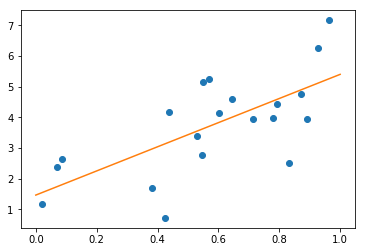

In [23]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print ("Model coefficient: %.5f, and intercept: %.5f"
       % (model.coef_, model.intercept_))

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);

### Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

#### Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


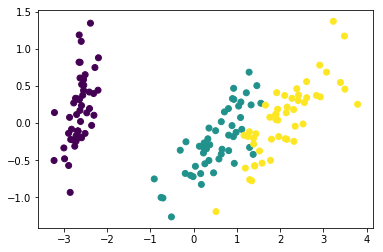

In [24]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print "Meaning of the 2 components:"
for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names))

#### Clustering: K-means

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

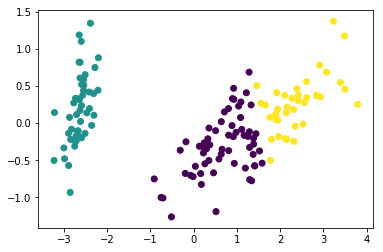

In [25]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

# Machine Learning with Scikit-Learn: Validation and Model Selection

This section focuses on **validation** and **model selection**.

## Supervised Learning Example: Classifying Digits

Features can be any **uniformly measured** numerical observation of the data. For example, in the digits data, the features are the brightness of each pixel:

In [26]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

Let's show a quick classification example, using the simple-and-fast Gaussian Naive Bayes estimator.

In [27]:
print X 
print X[:-5]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [28]:
from sklearn.naive_bayes import GaussianNB
X = digits.data
y = digits.target

# Instantiate the estimator
clf = GaussianNB()

# Fit the estimator to the data, leaving out the last five samples
clf.fit(X[:-5], y[:-5])

# Use the model to predict the last several labels
y_pred = clf.predict(X[-5:])

print y_pred
print y[-5:]

[9 0 8 9 8]
[9 0 8 9 8]


We see that this relatively simple model leads to a perfect classification of the last few digits!

Let's use the model to predict labes for the full dataset, and plot the **confusion matrix**, which is a convenient visual representation of how well the classifier performs:

classification accuracy: 0.858096828047


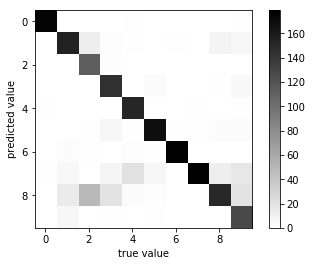

In [29]:
from sklearn import metrics

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.binary, interpolation='nearest')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    
print "classification accuracy:", metrics.accuracy_score(y, y_pred)
plot_confusion_matrix(y, y_pred)

Interestingly, there is confusion between some values.  In particular, the number **2** is often mistaken for the number **8** by this model!  But for the vast majority of digits, we can see that the lassification looks correct.

Let's use the ``metrics`` submodule again to print the accuracy of the classification:

In [30]:
print metrics.accuracy_score(y, y_pred)

0.858096828047


We have an 82% accuracy rate with this particular model.

But there's a problem: we are testing the model on the data we used to train the model. As we'll see later, this is generally not a good approach to model validation!  Because of the nature of the Naive Bayes estimator, it's alright in this case, but we'll see later examples where this approach causes problems.

# Measuring Prediction Performance

An important piece of the learning task is the measurement of prediction performance, also known as **model validation**.  We'll go into detail about this, but first motivate the approach with an example.

## The Importance of Splitting
Above we looked at a *confusion matrix*, which can be computed based on the results of any model. Let's look at another classification scheme here, the *K-Neighbors Classifier*

classification accuracy: 1.0


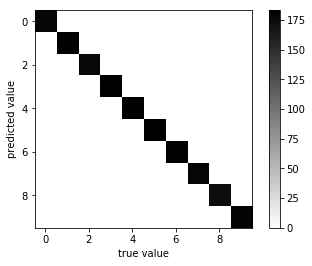

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print "classification accuracy:", metrics.accuracy_score(y, y_pred)
plot_confusion_matrix(y, y_pred)

Our classifier gives perfect results!  Have we settled on a perfect classification scheme?

**No!**  The *K*-neighbors classifier is an example of an instance-based classifier, which memorizes the input data and compares any unknown sample to it.  To accurately measure the performance, we need to use a separate *validation set*, which the model has not yet seen.

Scikit-learn contains utilities to split data into a training and validation set:

In [32]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print X_train.shape, X_test.shape

(1257, 64) (540, 64)


/Users/panisson/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


classification accuracy: 0.983333333333


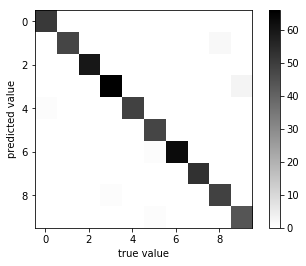

In [33]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "classification accuracy:", metrics.accuracy_score(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

This gives us a more accurate indication of how well the model is performing.

For this reason you should **always do a train/test split** when validating a model.

## Exploring Validation Metrics

Above, we used perhaps the most simple evaluation metric, the number of matches and mis-matches.  But this is not always sufficient.  For example, imagine you have a situation where you'd like to identify a rare class of event from within a large number of background sources.

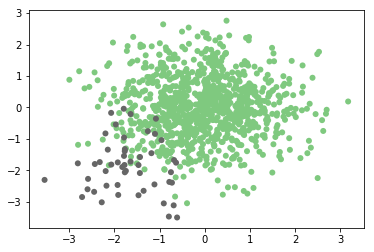

In [34]:
# Generate an un-balanced 2D dataset
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (950, 2)),
               np.random.normal(-1.8, 0.8, (50, 2))])
y = np.hstack([np.zeros(950), np.ones(50)])

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none',
            cmap=plt.cm.Accent)

### Exploring other Validation Scores

Until now we are using only the **accuracy** to evaluate our algorithms. We can calculate other scores such as the **precision**, the **recall**, and the **f1 score**:

In [35]:
from sklearn import metrics
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print "accuracy:", metrics.accuracy_score(y_test, y_pred)
print "precision:", metrics.precision_score(y_test, y_pred)
print "recall:", metrics.recall_score(y_test, y_pred)
print "f1 score:", metrics.f1_score(y_test, y_pred)

accuracy: 0.972
precision: 0.8
recall: 0.75
f1 score: 0.774193548387


#### What do these mean?

These are ways of taking into account not just the classification results, but the results **relative to the true category**.

- $$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

- $$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

- $$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

- $$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.
Here we've used the following definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


We can quickly compute a summary of these statistics using scikit-learn's provided convenience function:

In [36]:
print metrics.classification_report(y_test, y_pred,
                                    target_names=['background', 'foreground'])

             precision    recall  f1-score   support

 background       0.98      0.99      0.99       234
 foreground       0.80      0.75      0.77        16

avg / total       0.97      0.97      0.97       250



This tells us that, though the overall correct classification rate is 97%, we only correctly identify 67% of the desired samples, and those that we label as positives are only 83% correct!  This is why you should make sure to carefully choose your metric when validating a model.

## Cross-Validation

Using the simple train/test split as above can be useful, but there is a disadvantage: **You're ignoring a portion of your dataset**.  One way to address this is to use cross-validation.

The simplest cross-validation scheme involves running two trials, where you split the data into two parts, first training on one, then training on the other:

In [37]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
print X1.shape
print X2.shape

(500, 2)
(500, 2)


In [38]:
y2_pred = SVC(kernel='linear').fit(X1, y1).predict(X2)
y1_pred = SVC(kernel='linear').fit(X2, y2).predict(X1)

print np.mean([metrics.precision_score(y1, y1_pred),
               metrics.precision_score(y2, y2_pred)])

0.746732026144


This is known as **two-fold** cross-validation, and is a special case of *K*-fold cross validation.

Because it's such a common routine, scikit-learn has a K-fold cross-validation scheme built-in:

In [39]:
from sklearn.cross_validation import cross_val_score

# Let's do a 2-fold cross-validation of the SVC estimator
print cross_val_score(SVC(kernel='linear'), X, y, cv=2, scoring='precision')

[ 0.75        0.84210526]


It's also possible to use ``sklearn.cross_validation.KFold`` and ``sklearn.cross_validation.StratifiedKFold`` directly, as well as other cross-validation models which you can find in the ``cross_validation`` module.

Example: The ``SVC`` classifier takes a parameter ``C`` whose default value is ``1``.  Using 5-fold cross-validation, make a plot of the precision as a function of ``C``, for the ``SVC`` estimator on this dataset.  For best results, use a logarithmic spacing of ``C`` between 0.01 and 100.

/Users/panisson/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


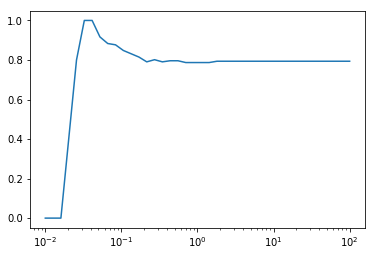

In [40]:
Cs = logspace(-2, 2, 40)
scores = []

for C in Cs:
    score = cross_val_score(SVC(kernel='linear', C=C), X, y, cv=5, scoring='precision')
    scores.append(score.mean())

plot(Cs, scores)
xscale('log')

## Grid Search

The previous exercise is an example of a **grid search** for model evaluation.  Again, because this is such a common task, Scikit-learn has a grid search tool built-in, which is used as follows.  Note that ``GridSearchCV`` has a ``fit`` method: it is a meta-estimator: an estimator over estimators!

In [41]:
from sklearn.grid_search import GridSearchCV

clf = SVC(kernel='linear')
Crange = np.logspace(-2, 2, 40)

grid = GridSearchCV(clf, param_grid={'C': Crange},
                    scoring='precision', cv=5)
grid.fit(X, y)

print "best parameter choice:", grid.best_params_

/Users/panisson/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


best parameter choice: {'C': 0.032570206556597828}


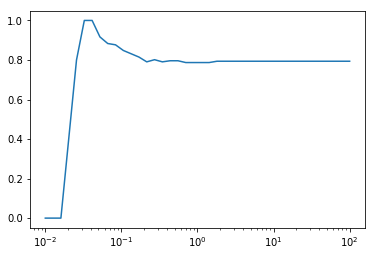

In [42]:
scores = [g[1] for g in grid.grid_scores_]
plt.semilogx(Crange, scores);

Grid search can come in very handy when you're tuning a model for a particular task.